In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
class Layer:
    def __init__(self, input_size, output_size):
        self.weights = np.random.randn(input_size, output_size) * 0.01
        self.biases = np.zeros((1, output_size))

    def forward(self, inputs):
        self.inputs = inputs
        self.outputs = np.dot(inputs, self.weights) + self.biases
        return self.outputs

    def backward(self, d_outputs, learning_rate):
        d_weights = np.dot(self.inputs.T, d_outputs)
        d_biases = np.sum(d_outputs, axis=0, keepdims=True)
        d_inputs = np.dot(d_outputs, self.weights.T)

        # Update weights and biases
        self.weights -= learning_rate * d_weights
        self.biases -= learning_rate * d_biases

        return d_inputs

class NeuralNetwork:
    def __init__(self):
        self.layers = []
        self.loss_history = []

    def add_layer(self, input_size, output_size):
        layer = Layer(input_size, output_size)
        self.layers.append(layer)

    def forward(self, X):
        for layer in self.layers:
            X = layer.forward(X)
        return X

    def backward(self, loss_gradient, learning_rate):
        for layer in reversed(self.layers):
            loss_gradient = layer.backward(loss_gradient, learning_rate)

    def train(self, X, y, epochs, learning_rate, loss_fn, loss_fn_derivative):
        for epoch in range(epochs):
            # Forward pass
            outputs = self.forward(X)

            # Compute loss
            loss = loss_fn(y, outputs)
            self.loss_history.append(loss)

            # Backward pass
            loss_gradient = loss_fn_derivative(y, outputs)
            self.backward(loss_gradient, learning_rate)

            # Print loss every 10 epochs
            if epoch % 10 == 0:
                print(f"Epoch {epoch}, Loss: {loss}")

    def evaluate(self, X, y, loss_fn):
        outputs = self.forward(X)
        loss = loss_fn(y, outputs)
        print(f"Evaluation Loss: {loss}")
        return loss

# Loss function: Mean Squared Error (MSE)
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mse_loss_derivative(y_true, y_pred):
    return -2 * (y_true - y_pred) / y_true.size

In [25]:
# Example dataset (Simple Linear Regression)
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([[2], [4], [6], [8], [10]])  # y = 2x

In [26]:
# Create and train the neural network
nn = NeuralNetwork()
nn.add_layer(1, 1)  # Single input, single output for linear regression

nn.train(X, y, epochs=1000, learning_rate=0.01, loss_fn=mse_loss, loss_fn_derivative=mse_loss_derivative)

Epoch 0, Loss: 44.535880922354444
Epoch 10, Loss: 0.24651142921558175
Epoch 20, Loss: 0.043496958954254164
Epoch 30, Loss: 0.039804261211565925
Epoch 40, Loss: 0.03719363586943246
Epoch 50, Loss: 0.03475777760842473
Epoch 60, Loss: 0.03248146280012195
Epoch 70, Loss: 0.03035422575159267
Epoch 80, Loss: 0.028366303163717237
Epoch 90, Loss: 0.026508571220392223
Epoch 100, Loss: 0.024772503631894576
Epoch 110, Loss: 0.023150132502054586
Epoch 120, Loss: 0.021634011758612657
Epoch 130, Loss: 0.02021718297855345
Epoch 140, Loss: 0.018893143451564783
Epoch 150, Loss: 0.017655816335048303
Epoch 160, Loss: 0.016499522763700904
Epoch 170, Loss: 0.015418955785662302
Epoch 180, Loss: 0.014409156005605736
Epoch 190, Loss: 0.013465488822981663
Epoch 200, Loss: 0.012583623160947247
Epoch 210, Loss: 0.011759511588355843
Epoch 220, Loss: 0.01098937174357235
Epoch 230, Loss: 0.010269668974858348
Epoch 240, Loss: 0.009597100117652765
Epoch 250, Loss: 0.008968578334290645
Epoch 260, Loss: 0.0083812189465

In [27]:
# Evaluate the neural network
nn.evaluate(X, y, mse_loss)

Evaluation Loss: 5.5781749459686816e-05


5.5781749459686816e-05

In [28]:
# Prediction
def predict(X):
    outputs = nn.forward(X)
    return outputs

# Test predictions
predictions = predict(X)
print("Predictions:", predictions)

Predictions: [[2.01265719]
 [4.00780828]
 [6.00295937]
 [7.99811046]
 [9.99326155]]


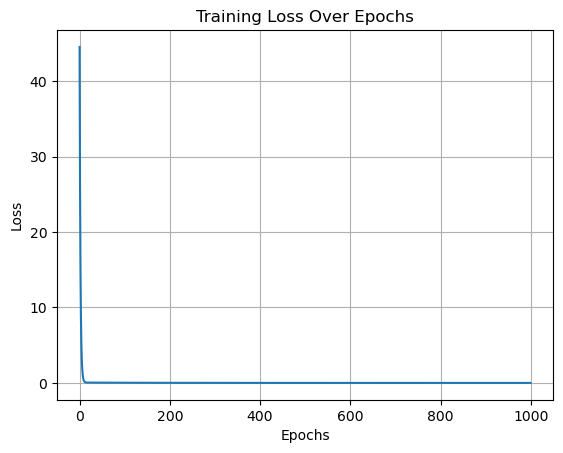

In [29]:
# Plot loss history
plt.plot(nn.loss_history)
plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.show()